# 콜백 함수

## <span style="font-size:25px">Concept Callback</span>

<img src='picture/TF_img_28_1.png' alt='TF_img_28_1' width=850>

<dl>
<dt style="font-size:20px">
▶ 콜백 함수라는 것은, 특정 상황에서 실행될 함수를 시스템에 등록하고, 
<br>　 만약 특정 상황이 발생하면 시스템이 자동으로 실행되는 함수이다.
</dt>
<br>
<dt style="font-size:20px">
▶ TensorFlow서 사용된느 콜백 함수는 모델의 학습 방향, 저장 시점 그
<br>　 리고 학습 정지 시점 등에 관한 모니터링을 위해 사용된다.
</dt>
<br>
<dd>

* 예를 들어, 학습 도중에 learning rate를 변화를 주거나 일정시간이 지나
<br>도 The val_loss of validation datas가 개선되지 않으면 학습이 저절로
<br>멈추기 되는 등의 작업을 할 수 있다.

* 이러한 TensorFlow의 콜백 함수는 다음 등이 있다.
<br>
<br>1. 학습 중에 learning rate의 변화를 줄 수 있는 ReduceLROnPlateau
<br>2. 모델의 weight value를 중간에 저장할 수 있는 ModelCheckpoint
<br>3. 모델 성능 지표가 일정 시간 동안 개선되지 않을 때 자동으로 종료 할 수
<br>　있게 하는 EarlyStopping
<br><br>이외 등등이 있다.
</dd>
</dl>

## <span style="font-size:25px">1. 학습률 조정 - ReduceLROnPlateau</span>

<dl>
<dt style="font-size:20px">
▶ 모델의 성능에 개선이 없을 경우, Learning Rate를 자동 조절하여 모델 성능을 
<br>　 개선하는 콜백 함수이다.
<br>　 factor parameter를 통해 Learning Rate를 조정함 (factor > 1.0)
</dt>
</dl>

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss',    # val_loss 기준으로 callback 호출
                             factor=0.5,            # callback 호출 시 학습률 1/2로 줄임
                             patience=3,            # epoch 3 동안 개선 되지 않으면 callback 호출
                             verbose=1)             # 로그 출력 형태(0, 1, 2)

hist = model.fit(x_train, t_train, 
                 epochs=50, validation_split=0.2, 
                 callbacks=[reduceLR])              # callback 함수를 시스템에 등록

## <span style="font-size:25px">2. 모델 Weight 중간 저장 - ModelCheckpoint</span>

<dl>
<dt stlye="font-size:20px">
▶ 모델 학습 도중 조건이 만족하게 되면 자동으로 현재의 Weight를 중간 저장함
</dt>
<br>
<dd>

* 학습 시간이 오래 걸린다면, 중간에 memory overflow나 crash 등이 나게 되면 
<br>그때 가중치를 불러와 학습을 이어갈 수 있기 때문에, 이러한 저장 기능은
<br>학습 시간을 단축할 수 있음
</dd>
</dl>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = '/modelcheckpoint_test.h5'
checkpoint = ModelCheckpoint(file_path,             # 저장할 file_path
                             monitor='val_loss',    # val_loss 값이 개선되었을 때 호출 
                             verbose=1,             # log 출력(0, 1, 2)
                             save_best_only=True,   # best 값만 저장
                             mode='auto')           # auto는 자동으로 best를 찾음

hist = model.fit(x_train, t_train, 
                 epochs=50, validation_split=0.2, 
                 callbacks=[checkpoint])            # callback 함수를 시스템에 등록

## <span style="font-size:25px">3. 학습 조기 종료 - EarlyStopping</span>

<dl>
<dt style="font-size:20px">
▶ 설정한 epoch 동안 개선이 되지 않을 경우 모델 학습을 조기 종료함
</dt>
<br>
<dd>

* 일반적으로 EarlyStopping과 ModelCheckpoint 조합을 통해서, 개선되지 않는 
<br>학습을 조기 종료하고, ModelCheckpoint에서 가장 best model을 다시 load
<br>하여 학습을 재게하는 경우가 일반적임
</dd>
</dl>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='auto')

stopping = EarlyStopping(monitor='val_loss', 
                         patience=5)

hist = model.fit(x_train, t_train, 
                 epochs=50, validation_split=0.2, 
                 callbacks=[checkpoint, stopping])

## <span style="font-size:25px">Deep Learning MNIST Example</span>

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(f"train shape: {x_train.shape}, train label shape: {t_train.shape}", 
      f"\ntest shape: {x_test.shape}, test label shape: {t_test.shape}")

print(f'train label: {t_train}\ntest label:  {t_test}')

train shape: (60000, 28, 28), train label shape: (60000,) 
test shape: (10000, 28, 28), test label shape: (10000,)
train label: [5 0 4 ... 5 6 8]
test label:  [7 2 1 ... 4 5 6]


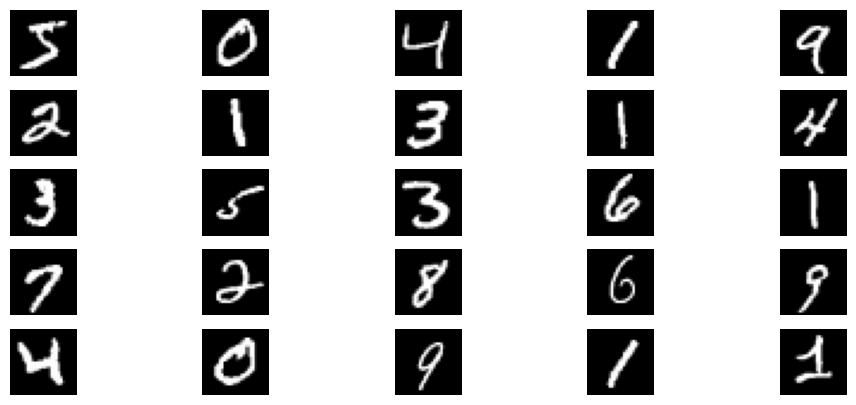

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
for i in range(5**2):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [27]:
x_train, x_test = (x_train - 0.0) / (255.0 - 0.0), (x_test - 0.0) / (255.0 - 0.0)

t_train = to_categorical(t_train, num_classes=10)
t_test = to_categorical(t_test, num_classes=10)

In [28]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(120, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 120)               94200     
                                                                 
 dense_5 (Dense)             (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='auto')

stopping = EarlyStopping(monitor='val_loss', 
                         verbose=1, 
                         patience=5)

hist1 = model.fit(x_train, t_train, 
                  epochs=30, validation_split=0.2, 
                  callbacks=[checkpoint, stopping])

Epoch 1/30
1487/1500 [============================>.] - ETA: 0s - loss: 0.0614 - accuracy: 0.9817
Epoch 1: val_loss improved from inf to 0.09564, saving model to .\modelchpoint_test.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.0956 - val_accuracy: 0.9714
Epoch 2/30
1499/1500 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9858
Epoch 2: val_loss improved from 0.09564 to 0.09043, saving model to .\modelchpoint_test.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0904 - val_accuracy: 0.9746
Epoch 3/30
1497/1500 [============================>.] - ETA: 0s - loss: 0.0375 - accuracy: 0.9887
Epoch 3: val_loss did not improve from 0.09043
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0909 - val_accuracy: 0.9747
Epoch 4/30
1484/1500 [============================>.] - ETA: 0s - loss: 0.0292 - a

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                             patience=3, verbose=1)

hist2 = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks=[reduceLR])

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.1038 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.1033 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0990 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.1101 - val_accuracy: 0.9741 - lr: 0.0010
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.1123 - val_accuracy: 0.9761 - lr: 0.0010
Epoch 6/30
1496/1500 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9980
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1500/1500 [==============================